# Table of Contents
 <p><div class="lev1 toc-item"><a href="#bokeh" data-toc-modified-id="bokeh-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>bokeh</a></div><div class="lev2 toc-item"><a href="#1.-中国省级数据地图" data-toc-modified-id="1.-中国省级数据地图-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. 中国省级数据地图</a></div><div class="lev2 toc-item"><a href="#2.-中国地图上标明城市位置" data-toc-modified-id="2.-中国地图上标明城市位置-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. 中国地图上标明城市位置</a></div><div class="lev1 toc-item"><a href="#matplotlib" data-toc-modified-id="matplotlib-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>matplotlib</a></div><div class="lev1 toc-item"><a href="#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></div><div class="lev2 toc-item"><a href="#official-bokeh-example" data-toc-modified-id="official-bokeh-example-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>official bokeh example</a></div><div class="lev3 toc-item"><a href="#bokeh-download-sample-data" data-toc-modified-id="bokeh-download-sample-data-311"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>bokeh download sample data</a></div><div class="lev3 toc-item"><a href="#draw-the-map" data-toc-modified-id="draw-the-map-312"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>draw the map</a></div><div class="lev3 toc-item"><a href="#look-at-the-data-structure" data-toc-modified-id="look-at-the-data-structure-313"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>look at the data structure</a></div><div class="lev2 toc-item"><a href="#data-of-city-or-region-level" data-toc-modified-id="data-of-city-or-region-level-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>data of city or region level</a></div><div class="lev2 toc-item"><a href="#look-into-data-structure-and-encoding" data-toc-modified-id="look-into-data-structure-and-encoding-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>look into data structure and encoding</a></div>

# bokeh

## 1. 中国省级数据地图

In [1]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
import shapefile
# pip install pyshp
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource, hplot
import seaborn as sns
from bokeh.models import HoverTool, layouts
from bokeh.resources import INLINE

In [3]:
ratedf = pd.read_csv('mapSampleData.csv')

In [4]:
# def draw_map_bokeh(
#         data, shpfile="map/bou2_4p.shp", title='中国地图', label='省份', varname='数据', fmt='%'):
data=ratedf; shpfile="map/bou2_4p.shp"; title='中国地图'; label='省份'; varname='数据'; fmt='%'


sf = shapefile.Reader(shpfile)
shapes = sf.shapes()

    
prov_x = []
prov_y = []
name = []
for shp in range(len(shapes)):
    points = shapes[shp].points
    array = np.array(points).T
    prov_x.append(array[0].tolist())
    prov_y.append(array[1].tolist())
    name.append(sf.shapeRecords()[shp].record[-1].decode('gb2312','ignore'))    


# Correct boundary for Hunan province
prov_x[277] = prov_x[277][:933]
prov_y[277] = prov_y[277][:933]


dataDict = {row[0]: row[1] for index, row in data.iterrows()}

colors = sns.light_palette("navy", 11, reverse=False).as_hex()
#     colors = sns.color_palette("Blues_d", 11).as_hex()[::-1]
prov_val = [dataDict[prov] for prov in name]

prov_colors = []
for value in prov_val:
    if np.isnan(value):
        prov_colors.append('#344552')
    else:
        prov_colors.append(colors[int(value/max(prov_val)*10)])


source = ColumnDataSource(data=dict(
    x=prov_x,
    y=prov_y,
    name=name,
    color=prov_colors,
    value=prov_val,
))

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"
main = figure(plot_width=700, plot_height=700, title = title, tools = TOOLS)
main.toolbar_location='left'

main.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.8,
          line_color="white", line_width=0.5)

hover = main.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    (label, "@name"),
    (varname, "@value"+fmt),
    ("(Long, Lat)", "($x, $y)"),
]

legend = figure(plot_height=main.plot_height, plot_width=5)
legend.toolbar_location=None
legend.rect(
    x=0.5, y=np.histogram([min(prov_val),max(prov_val)], bins=11)[1].tolist(), 
    fill_color=colors, line_width=0, width=1, height=1)
layout = layouts.Row(main, legend)
output_notebook(resources=INLINE, hide_banner=True)
show(layout);

## 2. 中国地图上标明城市位置

In [5]:
from io import StringIO
s = """city,jd,wd
    北 京,116.4666667,39.9
    上 海,121.4833333,31.23333333
    天 津,117.1833333,39.15
    重 庆,106.5333333,29.53333333
    哈尔滨,126.6833333,45.75
    长 春,125.3166667,43.86666667
    沈 阳,123.4,41.83333333
    呼和浩特,111.8,40.81666667
    石家庄,114.4666667,38.03333333
    太 原,112.5666667,37.86666667
    济 南,117,36.63333333
    郑 州,113.7,34.8
    西 安,108.9,34.26666667
    兰 州,103.8166667,36.05
    银 川,106.2666667,38.33333333
    西 宁,101.75,36.63333333
    乌鲁木齐,87.6,43.8
    合 肥,117.3,31.85
    南 京,118.8333333,32.03333333
    杭 州,120.15,30.23333333
    长 沙,113,28.18333333
    南 昌,115.8666667,28.68333333
    武 汉,114.35,30.61666667
    成 都,104.0833333,30.65
    贵 阳,106.7,26.58333333
    福 州,119.3,26.08333333
    台 北,121.5166667,25.05
    广 州,113.25,23.13333333
    海 口,110.3333333,20.03333333
    南 宁,108.3333333,22.8
    昆 明,102.6833333,25
    拉 萨,91.16666667,29.66666667
    香 港,114.1666667,22.3
    澳门,113.5,22.2"""
cities = pd.read_table(StringIO(s), sep=',', encoding='utf-8')
cities

city          jd         wd
0        北 京  116.466667  39.900000
1        上 海  121.483333  31.233333
2        天 津  117.183333  39.150000
3        重 庆  106.533333  29.533333
4        哈尔滨  126.683333  45.750000
5        长 春  125.316667  43.866667
6        沈 阳  123.400000  41.833333
7       呼和浩特  111.800000  40.816667
8        石家庄  114.466667  38.033333
9        太 原  112.566667  37.866667
10       济 南  117.000000  36.633333
11       郑 州  113.700000  34.800000
12       西 安  108.900000  34.266667
13       兰 州  103.816667  36.050000
14       银 川  106.266667  38.333333
15       西 宁  101.750000  36.633333
16      乌鲁木齐   87.600000  43.800000
17       合 肥  117.300000  31.850000
18       南 京  118.833333  32.033333
19       杭 州  120.150000  30.233333
20       长 沙  113.000000  28.183333
21       南 昌  115.866667  28.683333
22       武 汉  114.350000  30.616667
23       成 都  104.083333  30.650000
24       贵 阳  106.700000  26.583333
25       福 州  119.300000  26.083333
26       台 北  121.516667  25.050000
27       广 州  113.250000  23.133333
28       海 口  110.333333  20.033333
29       南 宁  108.333333  22.800000
30       昆 明  102.683333  25.000000
31       拉 萨   91.166667  29.666667
32       香 港  114.166667  22.300000
33        澳门  113.500000  22.200000

In [6]:
source_cities = ColumnDataSource(cities)
TOOLS="pan,wheel_zoom,box_zoom,reset,save"
p = figure(plot_width=700, plot_height=700, title = '中国地图', tools = TOOLS)

#p.patch(array[0].tolist(), array[1].tolist(), alpha=0.5, line_width=2)
p.patches('x', 'y', source=source,
          fill_color='lightblue', fill_alpha=0.7,
          line_color="white", line_width=0.5)
p.circle('jd', 'wd', source=source_cities)
p.text('jd', 'wd', 'city', source=source_cities, text_font_size='8pt', text_baseline='middle', x_offset=-5)
show(p);

# matplotlib

ImportError: No module named 'mpl_toolkits.basemap'

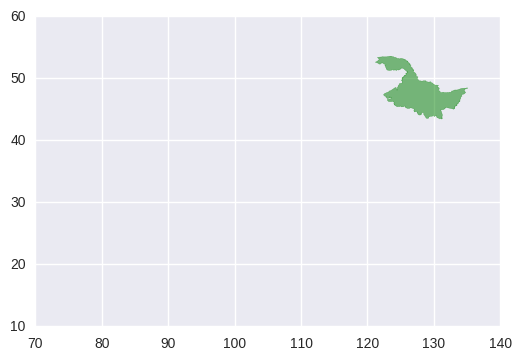

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile

sf = shapefile.Reader("map/bou2_4p.shp")
shapes = sf.shapes()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
pgon = plt.Polygon(shapes[0].points, color='g', alpha = 0.5)
plt.xlim([70,140])
plt.ylim([10,60])
ax.add_patch(pgon)

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
map = Basemap(projection='merc',llcrnrlon=70,llcrnrlat=15,urcrnrlon=140,urcrnrlat=55,lat_0=15,lon_0=95,resolution='l')
map.drawcoastlines(linewidth=0.25,color='b')
map.drawcountries(linewidth=0.25,color='k')
map.drawstates(linewidth=0.2,color='r')
map.drawrivers(linewidth=0.1,color='g')
map.drawmapboundary(fill_color='#689CD2')
map.drawmeridians(np.arange(70,140,17.5),labels=np.arange(70,140,17.5))
map.drawparallels(np.arange(15,55,15),labels=np.arange(15,55,15))
map.fillcontinents(color='#BF9E30',lake_color='#689CD2',zorder=0)
#map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\china_province', 'provence',color='k',linewidth=0.5)
#map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\CNSHP\\hubei','hubei',color='r')
#map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\CNSHP\\beijing','beijing',color='y')
#map.readshapefile('C:\\Users\\Administrator\\PycharmProjects\\BasemapTest\\CNSHP\\yellowriver','yellowriver',color='g')
plt.title('China Map')
plt.show() 

# Appendix

## official bokeh example

### bokeh download sample data

In [ ]:
import bokeh
bokeh.sampledata.download()

### draw the map

In [ ]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

In [ ]:
counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
county_colors = [colors[int(rate/3)] for rate in county_rates]

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
))

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Texas Unemployment 2009", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

#output_file("texas.html", title="texas.py example")
output_notebook()

show(p)

### look at the data structure

In [ ]:
import pandas as pd
counties_df = pd.read_csv('US_Counties.csv')
counties_df.head()

## data of city or region level

In [ ]:
def draw_map(shpfile):
    sf = shapefile.Reader(shpfile)
    shapes = sf.shapes()
    prov_x = []
    prov_y = []
    name = []
    for shp in range(len(shapes)):
        points = shapes[shp].points
        array = np.array(points).T
        prov_x.append(array[0].tolist())
        prov_y.append(array[1].tolist())
        name.append(sf.shapeRecords()[shp].record[6].decode('gb2312','ignore'))

    source = ColumnDataSource(data=dict(
        x=prov_x,
        y=prov_y,
        #color=county_colors,
        name=name,
        #rate=county_rates,
    ))
    
    TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"
    p = figure(plot_width=700, plot_height=700, title = '中国地图', tools = TOOLS)

    #p.patch(array[0].tolist(), array[1].tolist(), alpha=0.5, line_width=2)
    p.patches('x', 'y', source=source,
              fill_color='lightblue', fill_alpha=0.7,
              line_color="white", line_width=0.5)
    hover = p.select_one(HoverTool)
    hover.point_policy = "follow_mouse"
    hover.tooltips = [
        ("Name", "@name"),
        #("Unemployment rate", "@rate%"),
        ("(Long, Lat)", "($x, $y)"),
    ]
    show(p);

In [ ]:
draw_map('maps_data/maps/bou4/BOUNT_poly.shp')

## look into data structure and encoding

In [ ]:
sf = shapefile.Reader('maps_data/maps/bou4/BOUNT_poly.shp')

In [ ]:
shapes = sf.shapes()
prov_x = []
prov_y = []
name = []
#for shp in range(len(shapes)):
shp=0
points = shapes[shp].points
array = np.array(points).T
prov_x.append(array[0].tolist())
prov_y.append(array[1].tolist())
name.append(sf.shapeRecords()[shp].record[6].decode('gb2312','ignore'))

In [ ]:
sf.shapeRecords()[shp].record

In [ ]:
b'\xc4\xae\xba\xd3\xcf\xd8'.decode('gb2312','ignore')

In [ ]:
sf.fields

In [ ]:
# name of fields
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
field_names

In [ ]:
sf.shapeRecords()[1].record[-1].decode('gb2312','ignore')

In [ ]:
r = sf.shapeRecords()[0]
atr = dict(zip(field_names, r.record))
atr

In [ ]:
atr['NAME']

In [ ]:
type(b'\xba\xda\xc1\xfa\xbd\xad\xca\xa1')

In [ ]:
b'\xba\xda\xc1\xfa\xbd\xad\xca\xa1'.decode('gb2312','ignore')